<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/Project/DrinkingAccidentRiskPrediction/Drinking_Accident_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
0.7#프로젝트: 음주사고 위험도 예측 모델

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "프로젝트"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#matplotlib의 폰트를 NanumBarunGothic로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')



Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd

# CSV 파일 읽기 (original 파일)
from google.colab import drive
originaldata = pd.read_csv('/ML_project/original.csv', encoding="949")
originaldata.head()  #일부 정보 확인


,자치구별(2),교통사고수 (건),사업체수 (개),주점수,음주사고수 (건),인구밀도 (명/㎢),주차 면수 (면수),차량통행속도,휘발유 사용량,경유 사용량,LPG 사용량,도시공원수 (개소),도시공원면적 (천㎡)
0,종로구,1190,40490,7339,70,6869.0,90099,23.0,60.0,79.0,39.0,72.0,6448.6
1,중구,1252,62936,6357,39,13514.0,99538,19.9,277.0,739.0,385.0,59.0,3082.4
2,용산구,1337,20806,4315,106,11179.0,112712,27.0,173.0,308.0,16.0,65.0,781.7
3,성동구,1076,27278,3258,79,18551.0,123306,25.5,297.0,389.0,294.0,63.0,1260.0
4,광진구,1064,24688,4240,77,21819.0,127454,25.5,506.0,531.0,202.0,41.0,2913.1


In [ ]:
original = pd.DataFrame(originaldata) #original에 할당

#데이터 연관성 찾기

In [ ]:
corr_matrix = originaldata.corr() #상관관계 행렬 반환

<ipython-input-4-4d9d3c14b706>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = originaldata.corr() #상관관계 행렬 반환


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


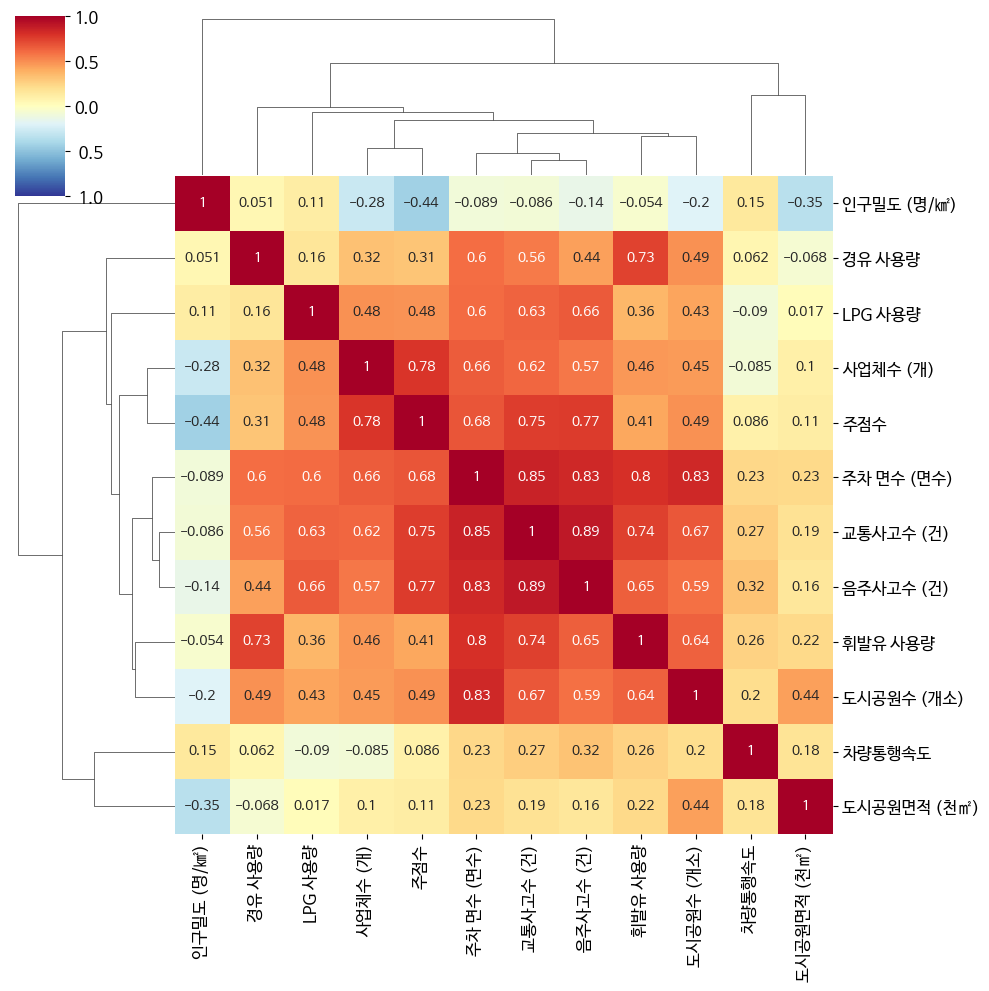

In [ ]:
import seaborn as sns

# ax = sns.heatmap(corr_matrix, annot=True, annot_kws=dict(color='k'), cmap='RdYlBu_r')
ax = sns.clustermap(corr_matrix,
                    annot=True,
                    cmap='RdYlBu_r',
                    vmin=-1, vmax=1)
plt.show()

In [ ]:
# 상관관계가 높은 상위 3개의 독립변수와 1개의 종속변수만 추출
drunken = original[["주점수", "주차 면수 (면수)", "교통사고수 (건)", "음주사고수 (건)"]]
drunken.describe()

,주점수,주차 면수 (면수),교통사고수 (건),음주사고수 (건)
count,150.000000,150.000000,150.000000,150.000000
mean,5023.746667,167331.340000,1505.713333,101.133333
std,2082.930673,72520.229442,647.992619,63.672786
min,2440.000000,78985.000000,591.000000,30.000000
25%,3687.250000,119363.250000,1103.500000,66.250000
50%,4322.000000,149398.500000,1367.000000,85.000000
75%,6325.250000,181528.500000,1573.500000,114.000000
max,12635.000000,402283.000000,3828.000000,406.000000


Saving figure seoul_plot2


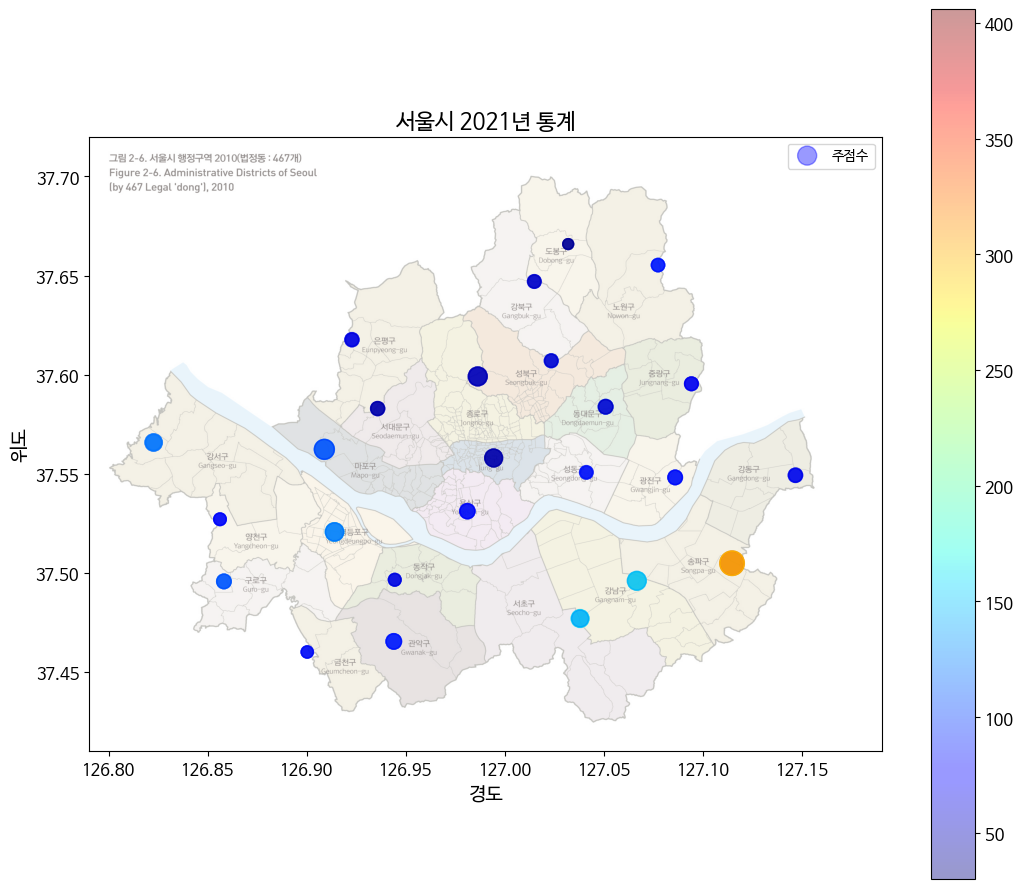

In [ ]:
# CSV 파일 읽기 (place21 파일)
placedata2 = pd.read_csv('/ML_project/place21.csv')
place2 = pd.DataFrame(placedata2) #place2에 할당

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 서울지도 그림을 먼저 표시
img_dir = '/ML_project/'
img = mpimg.imread(os.path.join(img_dir, 'seoul.jpg'))

fig, ax = plt.subplots(figsize=(11, 9))
ax.imshow(img, extent=[126.79, 127.19, 37.41, 37.72], alpha=0.5, cmap=plt.get_cmap("jet"))
ax.set_ylabel("Latitude", fontsize=14)
ax.set_xlabel("Longitude", fontsize=14)

# 데이터를 플롯 21년도 자치구별 주점
place2.plot(kind="scatter", x="경도", y="위도", alpha=0.4,
           s=placedata2["주점수"]/40, label="주점수",
           c=placedata2["음주사고수 (건)"], cmap=plt.get_cmap("jet"), colorbar=True,
           sharex=False, ax=ax)

ax.legend()
plt.title("서울시 2021년 통계", fontsize=16)
plt.tight_layout()
save_fig("seoul_plot2")
plt.show()

#무작위 샘플링: 훈련 세트,테스트세트 만들기


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

#1번의 분할을 수행 #테스트 비율 0.2 #결과 재현을 위한 랜덤시드
train_set, test_set = train_test_split(drunken, test_size=0.2, random_state=42, shuffle=True)

test_set.head()

,주점수,주차 면수 (면수),교통사고수 (건),음주사고수 (건)
73,7109,351025,2892,161
18,7052,171180,2386,179
118,7123,183911,2178,115
78,3885,133161,1119,80
76,6585,107738,955,49


In [ ]:
train_set.head()

,주점수,주차 면수 (면수),교통사고수 (건),음주사고수 (건)
22,11897,390451,3469,403
15,5464,259917,1584,122
65,6052,262157,1829,110
11,4174,160593,1067,69
42,3021,119994,932,93


#데이터 이해를 위한 시각화

In [ ]:
original_copy = original.copy()

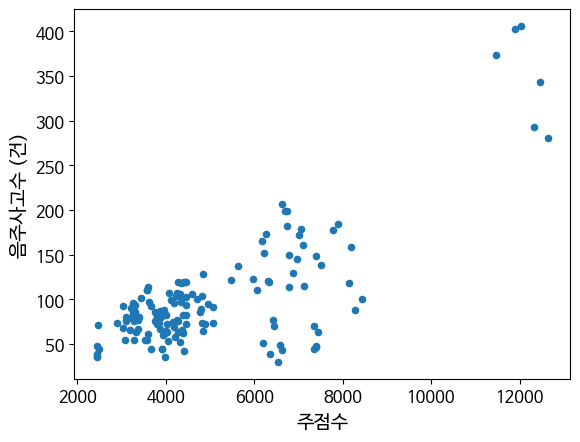

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# 데이터 프레임 생성
originaldata_example = original[["주점수", "음주사고수 (건)"]]

# 산점도 그래프 생성
ax = originaldata_example.plot(kind='scatter', x='주점수', y='음주사고수 (건)')
ax.set(xlabel='주점수', ylabel='음주사고수 (건)')
plt.show()


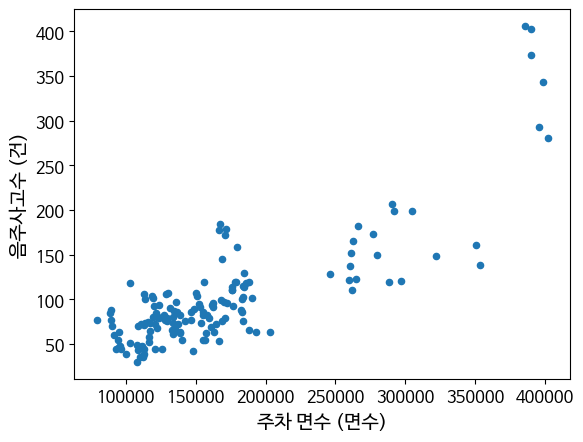

In [ ]:

# 데이터 프레임 생성
originaldata_example2 = original[['주차 면수 (면수)', "음주사고수 (건)"]]

# 산점도 그래프 생성
ax = originaldata_example2.plot(kind='scatter', x='주차 면수 (면수)', y='음주사고수 (건)')
ax.set(xlabel='주차 면수 (면수)', ylabel='음주사고수 (건)')
plt.show()


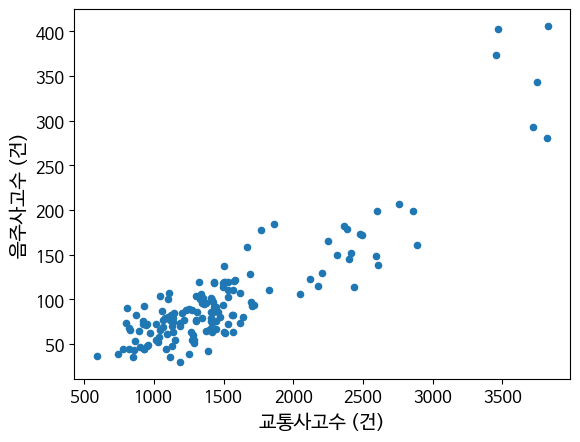

In [ ]:

# 데이터 프레임 생성
originaldata_example3 = original[["교통사고수 (건)", "음주사고수 (건)"]]

# 산점도 그래프 생성
ax = originaldata_example3.plot(kind='scatter', x="교통사고수 (건)", y='음주사고수 (건)')
ax.set(xlabel="교통사고수 (건)", ylabel='음주사고수 (건)')
plt.show()


#1차 선형 회귀 모델 분석

In [ ]:
from google.colab import drive
from sklearn.linear_model import LinearRegression

originaldata = pd.read_csv('/ML_project/original.csv', encoding="cp949")

# CSV 파일 로드 (original 파일)
data = pd.read_csv('/ML_project/original.csv', encoding="cp949")

# 독립 변수(X)와 종속 변수(y) 분리
X_train=train_set[["주점수", "주차 면수 (면수)", "교통사고수 (건)"]]
y_train=train_set['음주사고수 (건)']
X_test=test_set[["주점수", "주차 면수 (면수)", "교통사고수 (건)"]]
y_test=test_set['음주사고수 (건)']

# 다중 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 출력
print('회귀 계수:', model.coef_)

# 절편(intercept) 출력
print('절편:', model.intercept_)

# 결정계수(score) 출력
print('train set score: ',model.score(X_train, y_train))
print('test set score: ',model.score(X_test, y_test))

회귀 계수: [0.00569814 0.00018244 0.06014412]
절편: -47.55349963506842
train set score:  0.8531669107738444
test set score:  0.2964096942926884


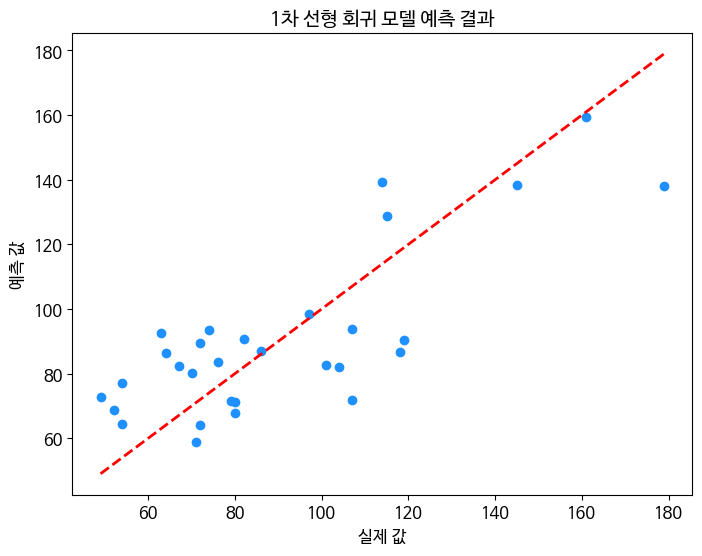

In [ ]:

# 다중 회귀 모델 생성
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(X_test, y_test)
# 예측 결과 계산
y_pred = multiple_regression_model.predict(X_test)

# 실제값과 예측값을 그래프로 표현
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('실제 값', fontsize=12)
plt.ylabel('예측 값', fontsize=12)
plt.title('1차 선형 회귀 모델 예측 결과', fontsize=14)
plt.show()


#다항회귀 분석
## 데이터셋 준비

In [ ]:
from google.colab import drive
originaldata = pd.read_csv('/ML_project/original.csv', encoding="949")
original = pd.DataFrame(originaldata) #original에 할당
drunken =original[["주점수", "주차 면수 (면수)", "교통사고수 (건)", "음주사고수 (건)"]]
drunken.head()  #일부 정보 확인

,주점수,주차 면수 (면수),교통사고수 (건),음주사고수 (건)
0,7339,90099,1190,70
1,6357,99538,1252,39
2,4315,112712,1337,106
3,3258,123306,1076,79
4,4240,127454,1064,77


In [ ]:
finalData=drunken.to_numpy()
print(finalData)

[[  7339  90099   1190     70]
 [  6357  99538   1252     39]
 [  4315 112712   1337    106]
 [  3258 123306   1076     79]
 [  4240 127454   1064     77]
 [  4453 123174   1718     94]
 [  3809 122128   1639     80]
 [  3990 155064   1557     82]
 [  3827  88173   1202     85]
 [  2462 112527    944     71]
 [  3583 175553   1499    114]
 [  4174 160593   1067     69]
 [  4329 116018   1032     52]
 [  7897 167122   1859    184]
 [  3262 162185   1343     96]
 [  5464 259917   1584    122]
 [  4401 177729   1433    119]
 [  3032 121784    824     68]
 [  7052 171180   2386    179]
 [  3426 119153   1409    101]
 [  4799 148454   1251     89]
 [  6748 266362   2361    182]
 [ 11897 390451   3469    403]
 [  6621 290809   2758    207]
 [  4171 172390   1371     96]
 [  7437  94485   1134     63]
 [  6445 108240   1128     70]
 [  4695 113341   1330    100]
 [  3252 121228   1143     85]
 [  4240 129859   1108    107]
 [  4340 135626   1699     97]
 [  3787 127195   1565     82]
 [  3952

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# 3:1 비율로 트레인셋과 테스트셋을 분리
train_input,test_input,train_target,test_target=train_test_split(finalData[:,0:3],finalData[:,3],random_state=42)

#다항회귀 분석
##(최적)2차항일 경우 : 계수 및 score

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 2차항으로 설정하여 다항회귀 분석
poly=PolynomialFeatures(degree=2,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(112, 9)


In [ ]:
# feature 종류 출력
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_poly,train_target)
print('절편 : ',lin_reg.intercept_,', 계수 : ',lin_reg.coef_)

절편 :  -31.026718884819857 , 계수 :  [-8.24975010e-04  7.63393905e-04  4.39552041e-03 -9.89550364e-07
  3.01536702e-08  9.16908373e-06 -2.13958696e-09  2.09233854e-10
 -1.61316477e-06]


In [ ]:
# 도출된 식 출력
k=train_poly.shape[1]
print('Y = ',end='')
for i in range(0,k) :
  if(i==0):
    print(lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
  else:
    if(lin_reg.coef_[i]>=0):
      print(' +',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
    else:
      print(' ',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
if(lin_reg.intercept_>=0):
  print(' +',lin_reg.intercept_)
else:
  print(' ',lin_reg.intercept_)

Y = -0.000824975009709932 x0 + 0.0007633939048168302 x1 + 0.0043955204096422056 x2  -9.895503643582818e-07 x0^2 + 3.015367020749429e-08 x0 x1 + 9.169083729246292e-06 x0 x2  -2.139586958343001e-09 x1^2 + 2.0923385406199416e-10 x1 x2  -1.613164774843189e-06 x2^2  -31.026718884819857


In [ ]:
test_poly=poly.transform(test_input)
print(test_poly.shape)

(38, 9)


In [ ]:
lin_reg.fit(train_poly,train_target)
# 트레인셋 결정계수 출력
print('train set score: ',lin_reg.score(train_poly,train_target))
# 테스트셋 결정계수 출력
print('test set score: ',lin_reg.score(test_poly,test_target))

train set score:  0.8929743154744355
test set score:  0.7732826349098035


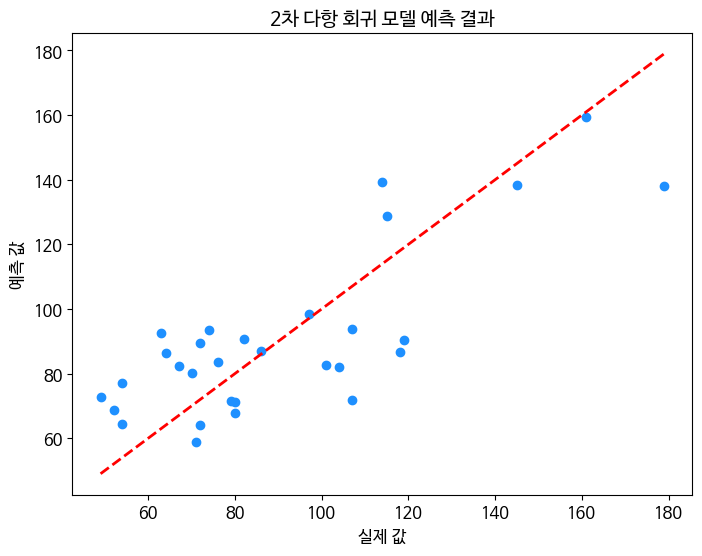

In [ ]:

# 다중 회귀 모델 생성
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(test_poly,test_target)
# 예측 결과 계산
test_pred = multiple_regression_model.predict(test_poly)

# 실제값과 예측값을 그래프로 표현
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('실제 값', fontsize=12)
plt.ylabel('예측 값', fontsize=12)
plt.title('2차 다항 회귀 모델 예측 결과', fontsize=14)
plt.show()


#다항회귀 분석
##3차항일 경우 : 계수 및 score 계산

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 3차항으로 설정하여 다항회귀 분석
poly=PolynomialFeatures(degree=3,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(112, 19)


In [ ]:
# feature 종류 출력
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_poly,train_target)
print('절편 : ',lin_reg.intercept_,', 계수 : ',lin_reg.coef_)

절편 :  121.6441881533696 , 계수 :  [-1.13101945e-01 -3.84691901e-04  2.11200917e-01  2.57345938e-05
 -7.03950484e-08 -2.42059835e-05  8.39151599e-09 -6.75908070e-07
 -3.46032183e-05 -2.01044497e-09 -5.67240025e-12  5.26004854e-09
  4.76423196e-13  1.10162552e-10 -1.65772857e-08 -2.90566099e-14
  9.11076773e-13 -9.06254542e-11  2.86983497e-08]


In [ ]:
# 도출된 식 출력
k=train_poly.shape[1]
print('Y = ',end='')
for i in range(0,k) :
  if(i==0):
    print(lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
  else:
    if(lin_reg.coef_[i]>=0):
      print(' +',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
    else:
      print(' ',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
if(lin_reg.intercept_>=0):
  print(' +',lin_reg.intercept_)
else:
  print(' ',lin_reg.intercept_)

Y = -0.11310194546313745 x0  -0.0003846919005023017 x1 + 0.21120091667663968 x2 + 2.5734593803073614e-05 x0^2  -7.039504839028702e-08 x0 x1  -2.420598347320985e-05 x0 x2 + 8.391515994227857e-09 x1^2  -6.759080704290317e-07 x1 x2  -3.460321827191548e-05 x2^2  -2.0104449662074017e-09 x0^3  -5.672400247224564e-12 x0^2 x1 + 5.2600485399704775e-09 x0^2 x2 + 4.764231959047728e-13 x0 x1^2 + 1.1016255204548525e-10 x0 x1 x2  -1.657728571862511e-08 x0 x2^2  -2.9056609883709025e-14 x1^3 + 9.110767730240991e-13 x1^2 x2  -9.062545424063522e-11 x1 x2^2 + 2.8698349698970422e-08 x2^3 + 121.6441881533696


In [ ]:
test_poly=poly.transform(test_input)
print(test_poly.shape)

(38, 19)


In [ ]:
lin_reg.fit(train_poly,train_target)
# 트레인셋 결정계수 출력
print('train set score: ',lin_reg.score(train_poly,train_target))
# 테스트셋 결정계수 출력
print('test set score: ',lin_reg.score(test_poly,test_target))

train set score:  0.9079671784454647
test set score:  0.7511802142795032


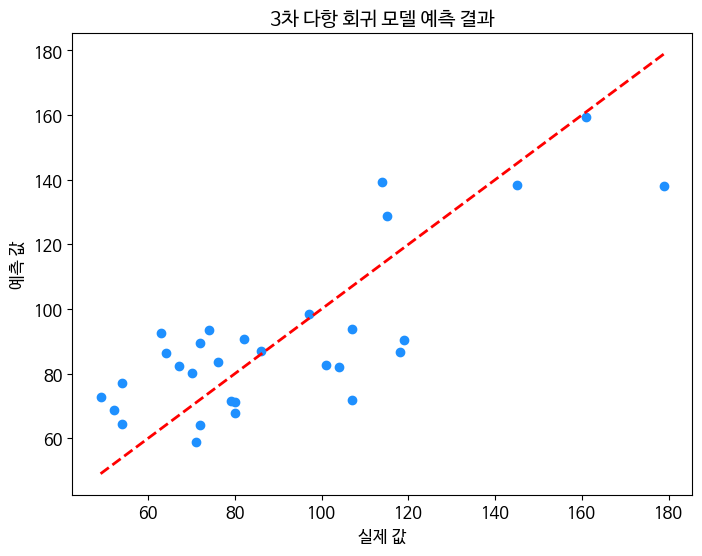

In [ ]:

# 다중 회귀 모델 생성
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(test_poly,test_target)
# 예측 결과 계산
test_pred = multiple_regression_model.predict(test_poly)

# 실제값과 예측값을 그래프로 표현
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('실제 값', fontsize=12)
plt.ylabel('예측 값', fontsize=12)
plt.title('3차 다항 회귀 모델 예측 결과', fontsize=14)
plt.show()


#다항회귀 분석
##4차항일 경우 : 계수 및 score 계산

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 4차항으로 설정하여 다항회귀 분석
poly=PolynomialFeatures(degree=4,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(112, 34)


In [ ]:
# feature 종류 출력
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_poly,train_target)
print('절편 : ',lin_reg.intercept_,', 계수 : ',lin_reg.coef_)

절편 :  46.349979955747685 , 계수 :  [-2.37361270e-07  5.43368723e-09  3.58517068e-12 -1.86775218e-08
 -2.14163981e-07  2.10653872e-08 -2.09610753e-09  8.53002772e-07
  1.48586330e-08 -1.54571434e-08  1.21654398e-09  3.08915037e-08
 -1.40070565e-11 -4.44380260e-09  1.31902904e-07  8.60937939e-14
  2.44317130e-11  3.74165832e-09 -2.92605632e-07  2.37029218e-12
 -1.21111155e-13 -1.38622133e-11 -6.56049553e-16  6.34631882e-13
  4.41025853e-11  3.56136689e-17  3.81519420e-15 -1.56751351e-12
 -8.96715176e-11 -6.72027210e-19  5.80850854e-17 -1.54814747e-14
  1.90547673e-12  9.08391703e-11]


In [ ]:
# 도출된 식 출력
k=train_poly.shape[1]
print('Y = ',end='')
for i in range(0,k) :
  if(i==0):
    print(lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
  else:
    if(lin_reg.coef_[i]>=0):
      print(' +',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
    else:
      print(' ',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
if(lin_reg.intercept_>=0):
  print(' +',lin_reg.intercept_)
else:
  print(' ',lin_reg.intercept_)

Y = -2.37361270455162e-07 x0 + 5.433687233791533e-09 x1 + 3.5851706849417935e-12 x2  -1.8677521817834553e-08 x0^2  -2.1416398077580623e-07 x0 x1 + 2.106538717840134e-08 x0 x2  -2.096107526170548e-09 x1^2 + 8.5300277195093e-07 x1 x2 + 1.4858633048019573e-08 x2^2  -1.5457143384147378e-08 x0^3 + 1.2165439774518629e-09 x0^2 x1 + 3.08915037443308e-08 x0^2 x2  -1.4007056474286825e-11 x0 x1^2  -4.443802604028715e-09 x0 x1 x2 + 1.3190290437459223e-07 x0 x2^2 + 8.609379391995697e-14 x1^3 + 2.4431712954165884e-11 x1^2 x2 + 3.7416583162991026e-09 x1 x2^2  -2.9260563240755573e-07 x2^3 + 2.3702921828358553e-12 x0^4  -1.2111115450510406e-13 x0^3 x1  -1.3862213341410488e-11 x0^3 x2  -6.560495532479613e-16 x0^2 x1^2 + 6.346318824374899e-13 x0^2 x1 x2 + 4.4102585340098276e-11 x0^2 x2^2 + 3.561366885943254e-17 x0 x1^3 + 3.815194195602237e-15 x0 x1^2 x2  -1.5675135118308637e-12 x0 x1 x2^2  -8.967151755954007e-11 x0 x2^3  -6.720272098255403e-19 x1^4 + 5.808508536334636e-17 x1^3 x2  -1.54814746635567e-14 x

In [ ]:
test_poly=poly.transform(test_input)
print(test_poly.shape)

(38, 34)


In [ ]:
lin_reg.fit(train_poly,train_target)
# 트레인셋 결정계수 출력
print('train set score: ',lin_reg.score(train_poly,train_target))
# 테스트셋 결정계수 출력
print('test set score: ',lin_reg.score(test_poly,test_target))

train set score:  0.8926790124363659
test set score:  0.6729370272605117


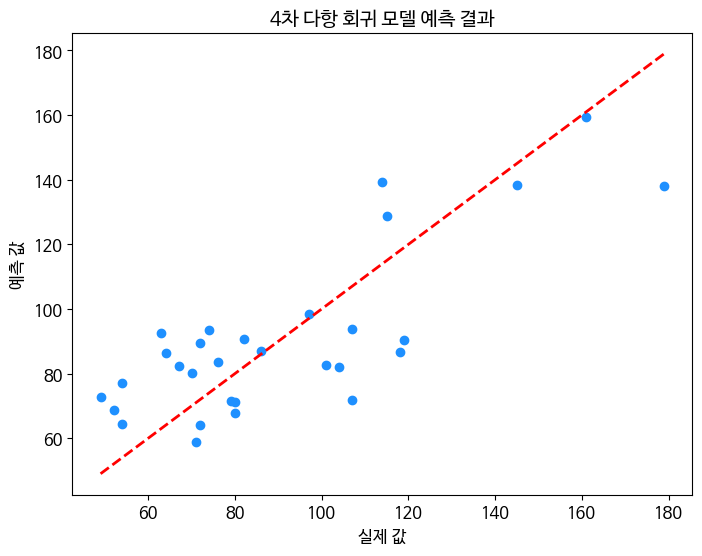

In [ ]:

# 다중 회귀 모델 생성
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(test_poly,test_target)
# 예측 결과 계산
test_pred = multiple_regression_model.predict(test_poly)

# 실제값과 예측값을 그래프로 표현
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('실제 값', fontsize=12)
plt.ylabel('예측 값', fontsize=12)
plt.title('4차 다항 회귀 모델 예측 결과', fontsize=14)
plt.show()


#다항회귀 분석
##5차항일 경우 : 계수 및 score 계산

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 5차항으로 설정하여 다항회귀 분석
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(112, 55)


In [ ]:
# feature 종류 출력
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_poly,train_target)
print('절편 : ',lin_reg.intercept_,', 계수 : ',lin_reg.coef_)

절편 :  34.70636163214873 , 계수 :  [-7.04461430e-13 -2.68870754e-13 -1.34670043e-15  4.42098156e-16
  9.14376720e-17  7.55068524e-19  1.85724331e-16  3.64534997e-17
  6.05613982e-19  7.99489666e-15  9.56483299e-14  2.12209981e-15
 -5.23928832e-13  3.63942969e-14  6.99278093e-16  2.81087458e-14
  1.05550521e-12  1.92655950e-14  3.21810774e-16 -4.74204323e-12
  5.52880431e-13 -6.57690881e-13 -2.39844307e-14  2.05782381e-13
 -5.70299133e-14  4.86809828e-16 -1.14840823e-14 -5.18587199e-14
  1.03708629e-13 -6.55830789e-18  1.09957890e-15 -1.12165503e-13
  4.52724984e-12  1.34470621e-13  5.49070593e-16 -4.86576772e-17
 -9.68390198e-16  1.95323784e-18 -1.39086210e-16  1.48587507e-14
 -5.31854015e-20  1.08747467e-17 -3.65148931e-16 -4.46260496e-14
  1.85771728e-21 -7.23456745e-19  8.90197561e-17 -6.15567253e-15
  2.66683675e-13 -3.00043813e-23  1.52544626e-20 -2.69487391e-18
  2.26767312e-16 -7.19108838e-15 -7.26624195e-14]


In [ ]:
# 도출된 식 출력
k=train_poly.shape[1]
print('Y = ',end='')
for i in range(0,k) :
  if(i==0):
    print(lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
  else:
    if(lin_reg.coef_[i]>=0):
      print(' +',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
    else:
      print(' ',lin_reg.coef_[i],poly.get_feature_names_out()[i],end='')
if(lin_reg.intercept_>=0):
  print(' +',lin_reg.intercept_)
else:
  print(' ',lin_reg.intercept_)

Y = -7.04461430352943e-13 x0  -2.688707536781276e-13 x1  -1.3467004315197495e-15 x2 + 4.420981555743538e-16 x0^2 + 9.14376720234301e-17 x0 x1 + 7.55068523583807e-19 x0 x2 + 1.857243311339637e-16 x1^2 + 3.645349965785704e-17 x1 x2 + 6.056139822496572e-19 x2^2 + 7.994896657198149e-15 x0^3 + 9.564832988496131e-14 x0^2 x1 + 2.1220998094054087e-15 x0^2 x2  -5.239288324117464e-13 x0 x1^2 + 3.639429689972174e-14 x0 x1 x2 + 6.992780926160273e-16 x0 x2^2 + 2.810874583612344e-14 x1^3 + 1.0555052080565534e-12 x1^2 x2 + 1.926559497175361e-14 x1 x2^2 + 3.2181077400052e-16 x2^3  -4.74204322649941e-12 x0^4 + 5.528804306039874e-13 x0^3 x1  -6.576908808854527e-13 x0^3 x2  -2.3984430746766615e-14 x0^2 x1^2 + 2.0578238056167708e-13 x0^2 x1 x2  -5.702991327565946e-14 x0^2 x2^2 + 4.868098277432975e-16 x0 x1^3  -1.1484082309893249e-14 x0 x1^2 x2  -5.185871987927507e-14 x0 x1 x2^2 + 1.0370862884005511e-13 x0 x2^3  -6.558307887784853e-18 x1^4 + 1.0995788961676757e-15 x1^3 x2  -1.1216550311736852e-13 x1^2 x2^2

In [ ]:
test_poly=poly.transform(test_input)
print(test_poly.shape)

(38, 55)


In [ ]:
lin_reg.fit(train_poly,train_target)
# 트레인셋 결정계수 출력
print('train set score: ',lin_reg.score(train_poly,train_target))
# 테스트셋 결정계수 출력
print('test set score: ',lin_reg.score(test_poly,test_target))

train set score:  0.9517704932836742
test set score:  0.5263962391784791


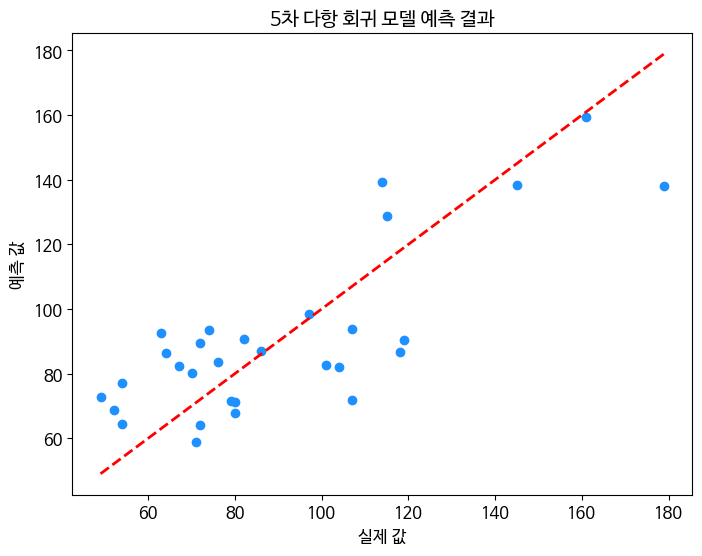

In [ ]:

# 다중 회귀 모델 생성
multiple_regression_model = LinearRegression()
multiple_regression_model.fit(test_poly,test_target)
# 예측 결과 계산
test_pred = multiple_regression_model.predict(test_poly)

# 실제값과 예측값을 그래프로 표현
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('실제 값', fontsize=12)
plt.ylabel('예측 값', fontsize=12)
plt.title('5차 다항 회귀 모델 예측 결과', fontsize=14)
plt.show()
